## Open Source Python Notebook using simple Rasterio & rioxarray library to examine raster.  

An example of a raster input (replace with any satellite source), examine its attributes and plot a histogram showing the distribution of the pixels.

The raster is already bounded from GEE.  Refer to other tutorials regarding GEE implementation.  
https://developers.google.com/earth-engine/guides  

This code has been tested under Colab.

### Extract a raster file and examine its attributes as well as examine a single band from that raster then show the image.  

Check version & install libraries.

In [ ]:
!python --version

Python 3.7.10


In [2]:
# for rasters, start with rasterio install
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [3]:
!pip install rioxarray

     |████████████████████████████████| 45 kB 3.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.6 MB 39.8 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.5.0-py3-none-any.whl size=53090 sha256=304eaf01d59094f7daed5c0d7ba1b6cefb22b26819a58b727fb901bf097063f2
  Stored in directory: /root/.cache/pip/wheels/95/34/d1/2e9ab5c844c963c12880be7890edbf20ec8da92b7e8a279a11
Successfully built rioxarray


In [4]:
# standard library
import os
from pprint import pprint

# common library
import numpy as np 
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# GIS libraries
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import xarray as xr
import rioxarray as rxr

### File location, setup for Google Drive, adjust for other paths.  

### Mount Google Drive or any other file location before proceeding.  

Fill in the empty command.

In [ ]:
# base dir for input files - optional but useful when moving files
base_dir =  # .... enter path here

# data dir for the rasters - highly suggestive to separate rasters from other files
raster_dir =  # ... enter path here

# output data dir - place all outputs from this notebook separate from other files
data_dir = # ... enter path here

# filename of the raster - only using 1 raster in this code - below is an example raster
raster_file = # ... raster filename

## Another import method, GDrive.  

Verifying file, upload and do raster inspection.

This is not used in this example.

In [ ]:
# upload file
from google.colab import files

uploaded = files.upload()

#### This raster comes from Google Earth Engine and is in a .tif format.

https://developers.google.com/earth-engine/datasets/catalog/  

Rasterio doc:  
https://rasterio.readthedocs.io/en/latest/

 This section describes examining the attributes and plot the image.  

In [6]:
# for single file operation, use line by line commands
# open file for rasterio
#      note the naming scheme, '.tif' is appended when GEE builds the raster
fp = os.path.join(raster_dir, raster_file)
  
# Open the file:
raster = rasterio.open(fp)

In [ ]:
# from rasterio doc: attributes
print(f'Raster shape:\t\t {raster.shape}')
print(f'Raster band count:\t {raster.count}')
print(f'Raster data types:\t {raster.dtypes} ')
print(f'Raster valid data mask:\t {raster.nodatavals}')
print(f'Raster not valid mask:\t {raster.nodata}')

Raster shape:		 (5581, 6807)
Raster band count:	 1
Raster data types:	 ('float32',) 
Raster valid data mask:	 (None,)
Raster not valid mask:	 None


In [ ]:
print(f'Raster metadata:\n')
pprint(raster.meta)

Raster metadata:

{'count': 1,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 5581,
 'nodata': None,
 'transform': Affine(0.00026949458523585647, 0.0, 73.33271057769937,
       0.0, -0.00026949458523585647, 19.395255804839355),
 'width': 6807}


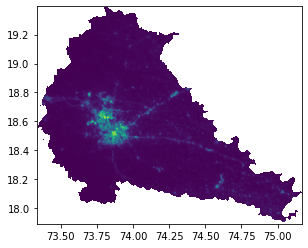

In [ ]:
# the plot dimensions show the longitude, x, and lattitude, y, inspect
show(raster);

### Bands  

From the metadata information block above, "count" shows 1 meaning only 1 band in this raster.  Using 1-based array index, showing the band information.  
https://rasterio.readthedocs.io/en/latest/topics/reading.html   


It is important to examine the band attributes of a given image.  Especially coming from GEE, there may be different attributes between bands, i.e. crs.  Also, many analysis focuses at the band level.  
https://developers.google.com/earth-engine/tutorials/tutorial_api_01

In [ ]:
# get the band and inspect
band = raster.read(1)

In [ ]:
print(f'Band size:\t{band.shape}')
print(f'Band dimensions:\t{band.ndim}')
print(f'Band data type:\t{type(band)}')

Band size:	(5581, 6807)
Band dimensions:	2
Band data type:	<class 'numpy.ndarray'>


In [ ]:
band

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [ ]:
# band has nan values on certain pixels, look at non-nan values
# band is a 2D ndarray, to examine values, it will flatten to 1D
# using to inspect stats only
count = band[~(np.isnan(band))] 

In [ ]:
# stats
print(f'\tmin: {count.min()},\n \tmean: {count.mean()},\n\tmedian: {np.median(count)},\n\tmax: {count.max()}')

	min: 0.038973335176706314,
 	mean: 1.5919933319091797,
	median: 0.6269668936729431,
	max: 45.90269470214844


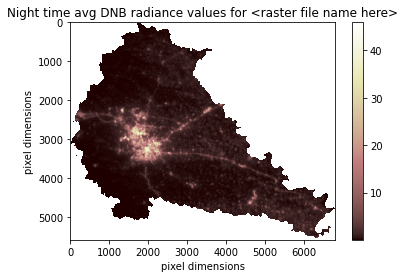

In [ ]:
# pink seems to show the light colors better than other colors
fig, ax = plt.subplots()
img = ax.imshow(band[:, :], cmap='pink')
fig.colorbar(img, ax=ax);
ax.set_xlabel('pixel dimensions')
ax.set_ylabel('pixel dimensions')
ax.set_title('Night time avg DNB radiance values for '+ '<raster file name here>');

## Histogram  

In addition to attribute inspection, one must know the distribution of the data to have an idea of what type to analyze.  

In this example raster, notice the right skewness of the distribution.  Depending on the objective analysis, transformation may be necessary. 

In this sample code notebook, the values are extracted for regression type analysis.  Another code notebook will explore classification type analysis.

(array([[13.,  0.,  0., ...,  0.,  0.,  0.],
        [32.,  0.,  0., ...,  0.,  0.,  0.],
        [38.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [43.,  0.,  0., ...,  0.,  0.,  0.],
        [29.,  0.,  0., ...,  0.,  0.,  0.],
        [13.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([3.8973335e-02, 4.6253457e+00, 9.2117176e+00, 1.3798090e+01,
        1.8384462e+01, 2.2970835e+01, 2.7557207e+01, 3.2143578e+01,
        3.6729950e+01, 4.1316322e+01, 4.5902695e+01], dtype=float32),
 <a list of 6807 Lists of Patches objects>)

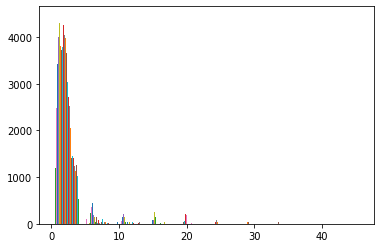

In [ ]:
# this may take several minutes
plt.hist(band)

## Values  

Having examined the attributes and analyzed the data including the image, in order to further use of the data, the values need extraction for further analysis.  

'Raster' is used to obtain the histogram of the satellite image.  

Raster2 converts the satellite data into values and in a Data Frame format.  

https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html

In [7]:
raster2 = rxr.open_rasterio(fp, masked=True).squeeze()

In [8]:
raster2

<xarray.DataArray (y: 5581, x: 6807)>
[37989867 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 73.33 73.33 73.33 73.33 ... 75.17 75.17 75.17 75.17
  * y            (y) float64 19.4 19.39 19.39 19.39 ... 17.89 17.89 17.89 17.89
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     avg_rad

In [9]:
raster2.shape

(5581, 6807)

In [10]:
type(raster2)

xarray.core.dataarray.DataArray

## Satellite Data  

https://corteva.github.io/rioxarray/stable/examples/examples.html  

This portion of the notebook will demonstrate the extraction of satellite data for regression analysis using the rioxarray library.

In [11]:
# from the attribute lists above, there is only 1 band in this sample image, "avg_rad".
# The label used in this code can be user defined, here it is using the band name.
# A user can use any label to be a column name once the data frame is created.
raster2 = raster2.to_dataframe('avg_rad')
raster2

band  spatial_ref  avg_rad
y         x                                    
19.395121 73.332845     1            0      NaN
          73.333115     1            0      NaN
          73.333384     1            0      NaN
          73.333654     1            0      NaN
          73.333923     1            0      NaN
...                   ...          ...      ...
17.891341 75.165947     1            0      NaN
          75.166217     1            0      NaN
          75.166486     1            0      NaN
          75.166756     1            0      NaN
          75.167025     1            0      NaN

[37989867 rows x 3 columns]

In [12]:
raster2.shape

(37989867, 3)

In [13]:
# eliminate the NaN, depending on the analysis, most likely invalide data will be discarded
raster2 = raster2.dropna()
raster2

band  spatial_ref   avg_rad
y         x                                     
19.394852 73.806617     1            0  0.138308
          73.806886     1            0  0.138308
          73.807156     1            0  0.138308
          73.807425     1            0  0.138308
          73.807695     1            0  0.138308
...                   ...          ...       ...
17.891611 75.028236     1            0  9.064309
          75.028505     1            0  9.064309
          75.028775     1            0  9.064309
17.891341 75.027697     1            0  9.064309
          75.027966     1            0  9.064309

[18404035 rows x 3 columns]

In [14]:
# note the reduction in data
# this can be helpful if computing resources are limited
raster2.shape

(18404035, 3)

In [15]:
# prepare the data for data frame, this is usually a common method
raster2 = raster2.reset_index()
raster2

,y,x,band,spatial_ref,avg_rad
0,19.394852,73.806617,1,0,0.138308
1,19.394852,73.806886,1,0,0.138308
2,19.394852,73.807156,1,0,0.138308
3,19.394852,73.807425,1,0,0.138308
4,19.394852,73.807695,1,0,0.138308
...,...,...,...,...,...
18404030,17.891611,75.028236,1,0,9.064309
18404031,17.891611,75.028505,1,0,9.064309
18404032,17.891611,75.028775,1,0,9.064309
18404033,17.891341,75.027697,1,0,9.064309


In [16]:
raster2.shape

(18404035, 5)

In [17]:
type(raster2)

pandas.core.frame.DataFrame

## Next steps.  

The above example is a quick way to examine an image, view the data, and prepare for regression analysis.

In [20]:
# close the image
raster.close()

In [ ]:
raster2 = rxr.open_rasterio(fp, masked=True).squeeze()

In [ ]:
raster2

<xarray.DataArray (y: 5581, x: 6807)>
[37989867 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 73.33 73.33 73.33 73.33 ... 75.17 75.17 75.17 75.17
  * y            (y) float64 19.4 19.39 19.39 19.39 ... 17.89 17.89 17.89 17.89
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     avg_rad

In [ ]:
# Check nodata value for array
raster2.rio.nodata

In [ ]:
raster2.data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

## Bins  

To identify how to partition the bins, this will use the histogram.  Histograms take up a huge resource so this is another reason to use a small AOI.  

Showing manual method to generate the bins through visuals and assign values.

In [ ]:
class_bins = [-np.inf, 5, 20, 30, np.inf]
class_bins

[-inf, 5, 20, 30, inf]

In [ ]:
raster_class = xr.apply_ufunc(np.digitize, raster2, class_bins)

In [ ]:
raster_class

<xarray.DataArray (y: 5581, x: 6807)>
array([[5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       ...,
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5]])
Coordinates:
    band         int64 1
  * x            (x) float64 73.33 73.33 73.33 73.33 ... 75.17 75.17 75.17 75.17
  * y            (y) float64 19.4 19.39 19.39 19.39 ... 17.89 17.89 17.89 17.89
    spatial_ref  int64 0

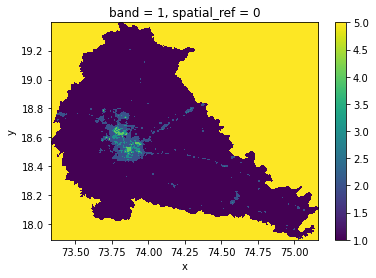

In [ ]:
# plot
im = raster_class.plot.imshow()

## Next steps.  

The above example transitioned from raster values to classifying raster ranges.  From here, based on use cases, an analysis can be done with modifying the mask sections of the image for classification  or clustering ML algorithms.

In [ ]:
# close the images
raster.close()
raster2.close()